Import necessary dependencies

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

Data analysis

In [2]:
df = pd.read_csv(r"Datasets/Medical charges/insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Convert text value to numeric

In [6]:
labelEncoder = LabelEncoder()

df["sex"] = labelEncoder.fit_transform(df["sex"])
# map for sex
sex = {index : label for index, label in enumerate(labelEncoder.classes_)}

df["smoker"] = labelEncoder.fit_transform(df["smoker"])
# map for smoker
smoker = {index: label for index,label in enumerate(labelEncoder.classes_)}

df["region"] = labelEncoder.fit_transform(df["region"])
# map for region
region = {index: label for index,label in enumerate(labelEncoder.classes_)}

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [9]:
# convert to int32 to save memory
df["children"] = df["children"].astype(np.int32)
df["age"] = df["age"].astype(np.int32)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int32  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int32  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(5)
memory usage: 47.2 KB


array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='sex', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>,
        <AxesSubplot:xlabel='children', ylabel='age'>,
        <AxesSubplot:xlabel='smoker', ylabel='age'>,
        <AxesSubplot:xlabel='region', ylabel='age'>,
        <AxesSubplot:xlabel='charges', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='sex'>,
        <AxesSubplot:xlabel='sex', ylabel='sex'>,
        <AxesSubplot:xlabel='bmi', ylabel='sex'>,
        <AxesSubplot:xlabel='children', ylabel='sex'>,
        <AxesSubplot:xlabel='smoker', ylabel='sex'>,
        <AxesSubplot:xlabel='region', ylabel='sex'>,
        <AxesSubplot:xlabel='charges', ylabel='sex'>],
       [<AxesSubplot:xlabel='age', ylabel='bmi'>,
        <AxesSubplot:xlabel='sex', ylabel='bmi'>,
        <AxesSubplot:xlabel='bmi', ylabel='bmi'>,
        <AxesSubplot:xlabel='children', ylabel='bmi'>,
        <AxesSubplot:xlabel='smoker', ylabel='bmi'>,
        <A

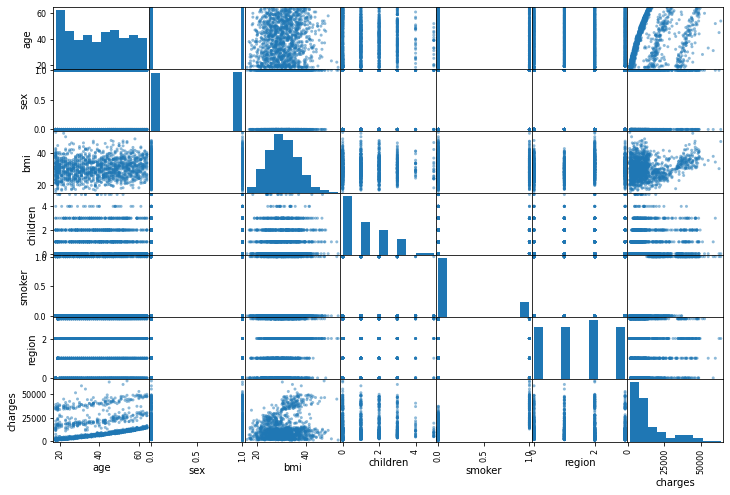

In [11]:
scatter_matrix(df, figsize=(12,8))

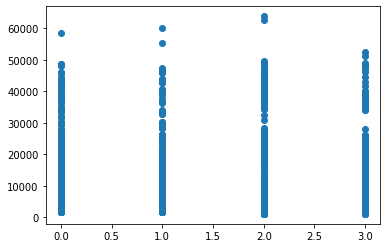

In [12]:
plt.scatter(df["region"],df["charges"])

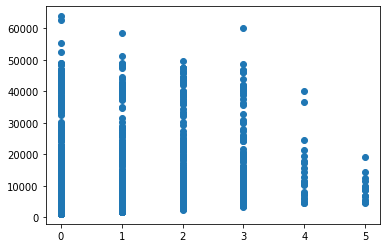

In [13]:
plt.scatter(df["children"],df["charges"])

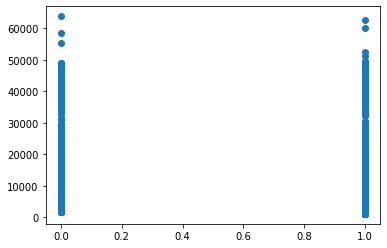

In [14]:
plt.scatter(df["sex"],df["charges"])

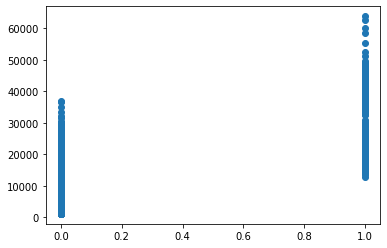

In [15]:
plt.scatter(df["smoker"],df["charges"])

As observed above, We can see there is little or no obvious relationship between the region, sex, number of children and the insurance charges. However, we can observe that there is certain relation between cigarette intake and insurance charges. We can prove by inspecting the median and mean of the insurance charges of the smoking community and non-smoking community

In [16]:
smoker = df.loc[df["smoker"] == 1]
smoker.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       274 non-null    int32  
 1   sex       274 non-null    int32  
 2   bmi       274 non-null    float64
 3   children  274 non-null    int32  
 4   smoker    274 non-null    int32  
 5   region    274 non-null    int32  
 6   charges   274 non-null    float64
dtypes: float64(2), int32(5)
memory usage: 11.8 KB


In [17]:
nonSmoker = df.loc[df["smoker"] == 0]
nonSmoker.sample(frac=0.26,random_state=42).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 41 to 212
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       277 non-null    int32  
 1   sex       277 non-null    int32  
 2   bmi       277 non-null    float64
 3   children  277 non-null    int32  
 4   smoker    277 non-null    int32  
 5   region    277 non-null    int32  
 6   charges   277 non-null    float64
dtypes: float64(2), int32(5)
memory usage: 11.9 KB


As the non smoking community is larger than the smoking community, we sample a portion from the non smoking community which are roughly of the same size with the smoking community to be compared

In [18]:
smoker.charges.median()

34456.348450000005

In [19]:
nonSmoker.sample(frac=0.26,random_state=42).charges.median()

7348.142

In [20]:
smoker.charges.mean()

32050.23183153284

In [21]:
nonSmoker.charges.mean()

8434.268297856204

Generally, mean and median of the insurance charges of the smoking community is a lot greater than the non smoker. Hence we can consider the smoker attribute into our Linear Regression Model

Now we drop the unnecessary column from the dataframe

In [22]:
y = np.array(df["charges"])

In [23]:
df.drop("charges",axis=1, inplace=True)
df.drop("region",axis=1, inplace=True)
df.drop("sex",axis=1, inplace=True)
df.drop("children",axis=1, inplace=True)

In [24]:
X = np.array(df)

In [25]:
# check shape of X and y
X.shape

(1338, 3)

In [26]:
y.shape

(1338,)

Train the model

Import and use the sklearn LinearRegression model to compare the performance 

In [27]:
model1 = LinearRegression()

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.9)

In [29]:
model1.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred = model1.predict(X_test)

In [31]:
# model score
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
MAE = mean_absolute_error(y_test, y_pred)
print(f"Model 1 Score\nMSE:{MSE}\nRMSE:{RMSE}\nMAE:{MAE}")

Model 1 Score
MSE:46513631.18022015
RMSE:6820.09026188218
MAE:4605.648959044951


Testing the performance of my own implementation of Linear Regression

Batch Gradient Descent

In [32]:
from LinearRegression import LinearRegression as LinearReg

In [33]:
model2 = LinearReg()

In [34]:
model2.fit(X_train,y_train,epoch=20000,learning_rate=0.00075,quiet=False)

Epoch #20000: : 100%|███████████████████████████████████████████████████████| 20000/20000 [00:11<00:00, 1816.94Epoch/s]


In [35]:
y_pred = model2.predict(X_test)

In [36]:
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
MAE = mean_absolute_error(y_test, y_pred)
print(f"Model 2 Score\nMSE:{MSE}\nRMSE:{RMSE}\nMAE:{MAE}")

Model 2 Score
MSE:47855671.243895985
RMSE:6917.7793578500305
MAE:4758.7975051639505


Stochastic Gradient Descent

In [37]:
model3 = LinearReg()

In [38]:
model3.fit(X_train,y_train,epoch=500,learning_rate=0.00035,optimizer="SGD",quiet=False)

Epoch #500: : 100%|██████████████████████████████████████████████████████████████| 500/500 [00:03<00:00, 133.33Epoch/s]


In [39]:
y_pred = model3.predict(X_test)

In [40]:
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
MAE = mean_absolute_error(y_test, y_pred)
print(f"Model 3 Score\nMSE:{MSE}\nRMSE:{RMSE}\nMAE:{MAE}")

Model 3 Score
MSE:51757210.70474864
RMSE:7194.248446137278
MAE:4586.493351019503


Mini-batch Gradient Descent

In [41]:
model4 = LinearReg()

In [42]:
model4.fit(X_train,y_train,epoch=7500,learning_rate=0.00035,optimizer="SGD",batch_size=64,quiet=False)

Epoch #7500: : 100%|██████████████████████████████████████████████████████████| 7500/7500 [00:06<00:00, 1198.96Epoch/s]


In [43]:
y_pred = model4.predict(X_test)

In [44]:
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
MAE = mean_absolute_error(y_test, y_pred)
print(f"Model 4 Score\nMSE:{MSE}\nRMSE:{RMSE}\nMAE:{MAE}")

Model 4 Score
MSE:46576832.24999763
RMSE:6824.722137200725
MAE:4560.383378012177
